<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/AI%20study/ODE/ErrorCorr_f(xy)_21_07_25_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Corr

f(x, y)

anal(x)

Error_Corr
    sigmoid(x)

    sigmoid_grad(x)

    neural_network(W, x)

    d_neural_network_dx(W, x, k=1)

f(x, y)

python version 3.10.4

tensorflow version 2.9.1

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


In [85]:
# 출력할 x 범위
x = tf.Variable(np.array([[i/100] for i in range(0, 100, 1)], dtype = np.float32))

# 차수, weight 개수
n = 4

# w = [weight1, weight2, weight3, weight4]
# weight에 쓸 변수 4개를 v에 랜덤변수 n개를 만듭니다.
v = tf.Variable(tf.random.truncated_normal([n]))
# w를 뽑아낸 랜덤변수 n개를 담고 있는 v로 대체 합니다.
w = tf.Variable(v.read_value())

# analysis 함수 
def anal(x, lamb = 1):
    return np.exp(lamb*x)

def f(x, y, lamb = 1):
    return lamb*x*y

# n : w 개수, w : weight
def y(x, w, n = 4):
    y = 1
    
    # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0

    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
      yprime += i*w[i-1]*(x**(i-1))

    return yprime


cost = lambda : tf.reduce_mean(tf.square(yprime(x, w, n = 4) - y(x, w, n = 4)))
optimizer = tf.optimizers.SGD(learning_rate = 1e-2)
train = optimizer.minimize(cost, var_list=w)
count = 100
for _ in range(count):
    train
train.trainable_variables

AttributeError: '_UnreadVariable' object has no attribute 'trainable_variables'

In [81]:
tf.reduce_mean(tf.square(yprime(x, w, n = 4) - y(x, w, n = 4)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.009570697>

In [48]:
# 훈련, 테스트 데이터 생성
# analysis 함수를 통해 x : 입력 값, y : 출력 값 을 생성 했습니다.
x_data = np.array(x)
y_data = anal(x)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=2)

In [49]:
batch_size = int(len(X_train) / 10)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

In [53]:
inputs = keras.Input(shape=(batch_size,1), name="digits")
x1 = layers.Dense(64, activation="relu")(inputs)
x2 = layers.Dense(64, activation="relu")(x1)
outputs = layers.Dense(batch_size, name="predictions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

In [54]:
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = cost

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0


TypeError: Cannot convert the argument `type_value`: <function <lambda> at 0x00000183AE554CA0> to a TensorFlow DType.

In [ ]:
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))

In [ ]:
# !pip install google
# !pip install protobuf

import

In [ ]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline

using GPU

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.python.client import device_lib 
device_lib.list_local_devices() 
tf.test.is_gpu_available()
# gpu를 사용하려면 cmd와 jupyter notebook cell에서 모두 True값이 나와야 함

Parameter

In [ ]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.1      # 최소 cost 
step_number = 30000   # step 횟수

In [ ]:
def f(x, y):          # f(x, y)
  return 2*x*y

def anal(x):
  return np.exp(x)

def Error_Corr(x_max = 1, w_number = 6, cost_limt = 0.1, step_number = 30000):
  def sigmoid(x):
      return 1 / (1 + tf.math.exp(-x))

  def sigmoid_grad(x):
      return sigmoid(x) * (1 - sigmoid(x))

  def neural_network(W, x):
      a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
      return tf.tensordot(a1, W[1], axes = 1)

  def d_neural_network_dx(W, x, k=1):
      return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

  x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  ye = (x**(w_number + 1)) * neural_network(W, x)
  yeprime = (w_number + 1) * (x**(w_number))*neural_network(W, x) + (x**(w_number + 1)) * d_neural_network_dx(W, x)

  cost = tf.reduce_mean(tf.square(yeprime - ye)) + tf.reduce_mean(tf.square(yprime - f(x, y)))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  count = 0
  cost_val = 1
  while cost_val > cost_limt:
    global x_space
    global y_space
    global ye_space
    global corr_space
    global cost_space

    x_space = []
    y_space = []
    ye_space = []
    corr_space = []
    cost_space = []

    if count % 1 == 0:
      print("count: ", count)
    for step in range(step_number + 1):
      for i in range(1, w_number + 1):
          globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
      cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, f(x, y), x, train])
      if count % 1 == 0:
        if step % int(step_number / 2) == 0:
            print('step: ', step, ", Cost: ", cost_val, "\n")
    if count % 1 == 0:
      print("\n")

    count += 1

    x_space += list(x_val)
    corr_space += list(ye_val + y_val)
    y_space += list(y_val)
    ye_space += list(ye_val)

    # final_sol = ye + f(x, y)
    # anal_sol = anal(x)
    # error = abs(final_sol - anal_sol)
    # print(np.linalg.norm)
    plt.plot(x_space, corr_space, '.', label = 'ye + f(x,y)')
    plt.plot(x_space, y_space, '.', label = 'f(x,y)')
    plt.plot(x_space, ye_space, '.', label = 'ye')
    plt.plot(x_space, anal(x_space), '.', label = 'exp')
    plt.legend()
    plt.show()

  sess.close()

In [ ]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.01      # 최소 cost 
step_number = 50    # step 횟수 -> 총 step 횟수 = count * step

def f(x, y):          # f(x, y)
  return y

def anal(x):
  return np.exp(x)

Error_Corr(x_max, w_number, cost_limit, step_number)

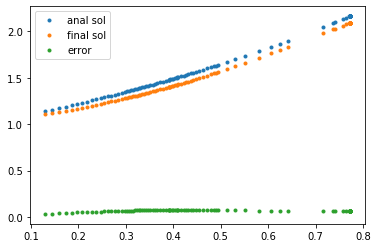

0.7003669


In [ ]:
error = abs(corr_space - anal(x_space))
plt.plot(x_space, anal(x_space), '.', label = 'anal sol')
plt.plot(x_space, corr_space, '.', label = 'final sol')
plt.plot(x_space, error, '.', label = 'error')
plt.legend()
plt.show()
print(np.linalg.norm(error))